<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/Review/3%EC%A3%BC%EC%B0%A8_%EB%B3%B5%EC%8A%B5(12_11_~_12_15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12월 11일

# SVM(Support Vector Machine)
- 머신러닝 알고리즘 중 하나
- DNN 보다는 성능이 떨어지지만, model이 가볍고 빠르다!!
- 회귀, 분류 둘 다 사용 가능
- 이상치에 매우 민감하다는 단점이 있다
- SVR, SVC

In [ ]:
! pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

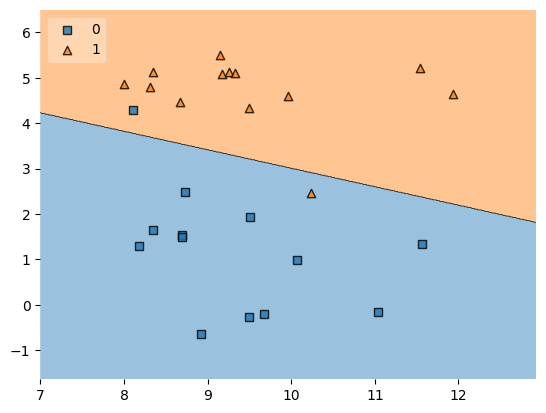

In [ ]:
# Raw Data Loading
x_data, t_data = mglearn.datasets.make_forge()

# matplotlib을 이용해서 데이터를 scatter를 통해서 확인할꺼예요!
# 각 데이터(x_data)에 대해 t_data가 0이면 red점으로, 1이면 blue점으로 표시해보아요!
# x_data_red = x_data[t_data == 0]
# x_data_blue = x_data[t_data==1]

# plt.scatter(x_data_red[:,0],
#             x_data_red[:,1],
#             color='r')

# plt.scatter(x_data_blue[:,0],
#             x_data_blue[:,1],
#             color='b')
# plt.show()

# model 생성
model = SVC(kernel='linear')
model.fit(x_data,t_data)

# support vector 확인
model.support_vectors_
model.n_support_  # [3 3]  => 클래스(분류)가 2개이고 각 분류에 support vector가
                  # 3개씩 있다는 의미

# 시각화
plot_decision_regions(X=x_data,
                      y=t_data,
                      clf=model,  # clf -> 우리가 만든 모델 적어주면 된다
                      legend=2)   # legend -> 우리 모델의 클래스 개수!
plt.show()


In [ ]:
# 대충 이해했으니 연습을 해보아요!
# 이진분류를 해봤으니
# Multinomial Classification(다중분류)을 SVM으로 구현해 보아요!
# iris 데이터를 가지고 해보아요!

# decision boundaries 찾아서 그래프를 그려 보세요!
# 그런데 feature가 4개에요!(2차원 평면에 표현이 불가)

# 차원축소를 이용해 새로운 2개의 feature를 생성하던가!!
# 아니면 상관관계 분석과 같은걸 통해 필요없는 feature를 제거!!

# 이번에는 차원축소가 아닌 상관관계가 높은 2개의 feature만 사용
# 꽃받침(sepal)의 길이와 너비만 사용(feature 2개)

# SVM 역시 모델의 한 종류이므로 LogisticRegression 모델을 불러올 필요 없음 주의!!

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 결측치, 이상치는 실제 데이터이므로 처리하지 않아요!
# 중복데이터 제거
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['petal_length','petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

0.7333333333333333


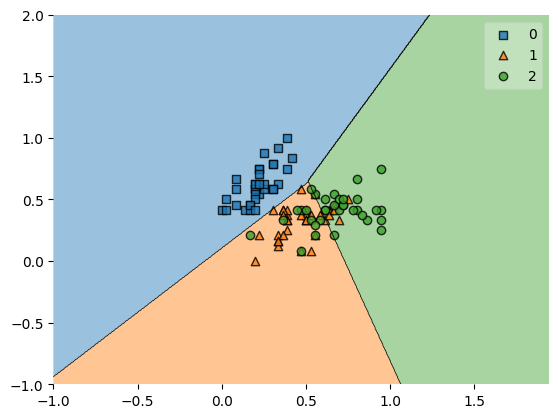

In [ ]:
# 모델 생성
model = SVC(kernel='linear')

model.fit(x_data_train_norm,
          t_data_train)

# 평가 진행
score = accuracy_score(t_data_test, model.predict(x_data_test_norm))
print(score)

# 시각화
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()

In [ ]:
# 주성분분석을 통해서 한번 차원축소된 데이터를 이용해서
# 한번 처리해 보아요!

# PCA를 통해 차원축소된 데이터로 처리하면 결과가 어떻게 될까요?

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 결측치, 이상치는 실제 데이터이므로 처리하지 않아요!
# 중복데이터 제거
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# PCA 진행
pca = PCA(n_components=2)
x_data_norm_pca = pca.fit_transform(x_data_norm)

# 데이터 분리
x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

0.9777777777777777


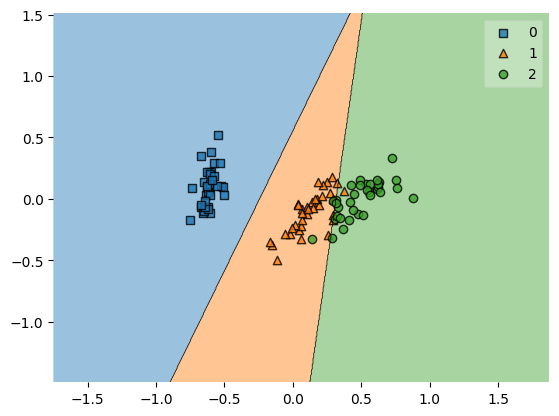

In [ ]:
# model 생성
model = SVC(kernel='linear')
model.fit(x_data_train_norm_pca,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm_pca)))

# 시각화
plot_decision_regions(X=x_data_train_norm_pca,
                      y=t_data_train,
                      clf=model)
plt.show()

In [ ]:
# 마지막으로 SVM으로 모델을 생성해 볼껀데!!
# 사용하는 데이터는 Iris 데이터를 이용.
# feature의 개수는 4개를 다 이용(꽃받침 길이, 너비 그리고 꽃잎의 길이, 너비)
# hyperparamer를 지정해서 모델을 생성해야 하는데 이 작업을 자동화 시킬꺼예요!

# 필요 module import
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)  # random_state 설정해 주면 결과가 동일하게 나옴

# param_grid를 설정해요!
# 리스트 안에 2개의 딕셔너리 생성
# 1개는 kernel이 linear인 경우, 나머지 1개는 kernel이 linear가 아닌 경우로 사용
param_grid = [{
    'kernel':['linear'],
    'C':[0.1, 0.5, 10, 100]
},{
    'kernel':['rbf'],
    'C':[0.1, 0.5, 10, 100],
    'gamma':[0.001,0.01,0.1]
}]

# 모델 생성
model = SVC()

grid_search =GridSearchCV(model,
                          param_grid,
                          cv=5,
                          scoring='accuracy',
                          verbose=2)

grid_search.fit(x_data_train_norm,
                t_data_train)

# 당연히 좋은 parameter를 알아내 그걸 사용하는게 좋겠죠!
# 해당 parameter를 이용했을때의 정확도도 같이 알려줘요!
print(grid_search.best_params_)
print(grid_search.best_score_)

# 이제 최종 모델을 만들고 적용해보아요!
model = SVC(kernel='linear',
            C=10)

# 학습하기
model.fit(x_data_train_norm,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, k

# 12월 12일
# Decision Tree(결정 트리)
- Root Node(시작), Intermediate Node(중간), Terminal/Leaf Noed(끝)
- Entropy, 정보 획득

# KNN(K-Nearest Neightbor)
- k = hyperparameter
- 최단거리 찾아서 분류하는 알고리즘
- 유클리드 거리
  -> root[(x2-x1)^2 + (y2-y1)^2]

In [ ]:
import numpy as np
result_ori = -(10/16 * np.log2(10/16)) - (6/16*np.log2(6/16))
result_ori


0.954434002924965

In [ ]:
# R1 영역
r1 = 8/16 * -((7/8)*np.log2(7/8) + (1/8)*np.log2(1/8))

# R2 영역
r2 = (8/16) * -((5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

result = r1 + r2
result

0.7489992230622807

In [ ]:
# informaiton gain(정보 획득량)은
# 전체 entropy - 분기 후 entropy
result_ori - result

0.20543477986268432

In [ ]:
# 전체 entropy - [yes 9, no 5]
result = -((9/14) * np.log2(9/14) + (5/14)*np.log2(5/14))
result

0.9402859586706311

In [ ]:
# root node를 wind로 분류해서 entropy 계산
# weak -> [yes 6, no 2]
# strong -> [yes 3, no 3]
result_wind_weak = (8/14) * -((6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))
result_wind_strong = (6/14) * -((3/6)*np.log2(3/6) + (3/6)*np.log2(3/6))

result_wind = result_wind_weak + result_wind_strong
result_wind

0.8921589282623617

In [ ]:
# sunny -> [yes 2 no 3]
# overcast -> [yes 4 no 0]
# rain -> [yes 3 no 2]

result_outlook_sunny = (5/14) * -((2/5)*np.log2(2/5) + (3/5) * np.log2(3/5))
result_outlook_overcast = (4/14) * -((4/4)*np.log2(4/4))
result_outlook_rain = (5/14) * -((3/5)*np.log2(3/5) + (2/5) * np.log2(2/5))

result_outlook = result_outlook_sunny + result_outlook_overcast + result_outlook_rain
result_outlook

0.6935361388961918

In [ ]:
# humidity
# high -> [yes 3 no 4]
# normal -> [yes 6 no 1]

result_high = (7/14) * -((3/7) * np.log2(3/7) + (4/7) * np.log2(4/7))
result_normal = (7/14) * -((6/7) * np.log2(6/7) + (1/7) * np.log2(1/7))

result_humidity = result_high + result_normal
result_humidity

0.7884504573082896

In [ ]:
# 전체 데이터를 wind로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_wind)

# 전체 데이터를 outlook으로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_outlook)

# 전체 데이터를 humidity로 분류했을때 우리가 얻을 수 있는 정보량
print(result - result_humidity)


0.04812703040826949
0.24674981977443933
0.15183550136234159


In [ ]:
# 위와 같은 Decision Tree를 사용하려면 어떻게 해야하나요?
# sklearn을 이용해서 사용하면 되요!

# iris 예제를 이용하여 Decision Tree를 구현해 보아요
# feature는 2개만 사용할 거에요!(꽃받침의 길이, 꽃잎의 길이)

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Raw Data Loading
iris = load_iris()

df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df

# 중복 데이터 처리
df = df.drop_duplicates()
df

# 데이터 준비
x_data = df.drop([ 'sepal_width', 'petal_width', 'target'],axis=1, inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

0.8666666666666667


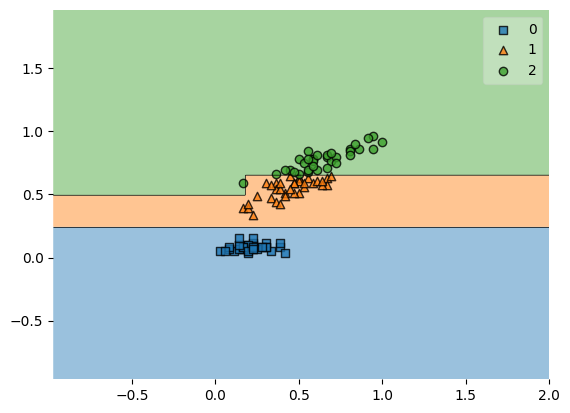

In [ ]:
# model 생성
model = DecisionTreeClassifier()

model.fit(x_data_train_norm,
          t_data_train)

score = accuracy_score(t_data_test,
               model.predict(x_data_test_norm))
print(score)

plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()

In [ ]:
# 우리가 진행했던 데이터 중 MNIST 데이터가 있어요
# 이걸 사용해서 다중분류작업을 수행해볼 예정이에요
# 3가지로 구현할 예정!

# 1. Regression을 이용해서 구현(tensorflow, sklearn 사용)
# 2. SVM 사용해서 구현(sklearn 사용) -GridSearchCV
# 3. DecisionTree 이용해서 구현

# 각 모델의 정확도는 어떻게 되는지 알아보아요!
%reset

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 결측치, 이상치 없으므로 정규화 진행
# 데이터 준비
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

In [ ]:
# tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate = 1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                batch_size=100,
                verbose=1,
                validation_split = 0.3)

keras_model.evaluate(x_data_test_norm,
                    t_data_test)

Epoch 1/100
206/206 [==============================] - 2s 6ms/step - loss: 0.4417 - acc: 0.8695 - val_loss: 0.3239 - val_acc: 0.9049
Epoch 2/100
206/206 [==============================] - 1s 5ms/step - loss: 0.2974 - acc: 0.9122 - val_loss: 0.3020 - val_acc: 0.9137
Epoch 3/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2710 - acc: 0.9230 - val_loss: 0.3103 - val_acc: 0.9161
Epoch 4/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2638 - acc: 0.9240 - val_loss: 0.3005 - val_acc: 0.9190
Epoch 5/100
206/206 [==============================] - 1s 4ms/step - loss: 0.2508 - acc: 0.9279 - val_loss: 0.2983 - val_acc: 0.9161
Epoch 6/100
206/206 [==============================] - 1s 5ms/step - loss: 0.2441 - acc: 0.9290 - val_loss: 0.3010 - val_acc: 0.9171
Epoch 7/100
206/206 [==============================] - 1s 4ms/step - loss: 0.2367 - acc: 0.9315 - val_loss: 0.2991 - val_acc: 0.9181
Epoch 8/100
206/206 [==============================] - 1s 4ms/step - 

[0.540421187877655, 0.8999999761581421]

In [ ]:
# sklearn 구현
sklearn_model = LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

score = accuracy_score(t_data_test, sklearn_model.predict(x_data_test_norm))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# SVM 구현
svm_model = SVC()
svm_model.fit(x_data_train_norm,
              t_data_train)
svm_model_result = accuracy_score(t_data_test,
                                  svm_model.predict(x_data_test_norm))

print(svm_model_result)

0.9738095238095238


In [ ]:
# Decision Tree 구현
dt_model = DecisionTreeClassifier()

dt_model.fit(x_data_train_norm,
             t_data_train)

dt_score = accuracy_score(t_data_test,
                          dt_model.predict(x_data_test_norm))

dt_score

0.8469047619047619

In [ ]:
#KNN 구현
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_data_train_norm,
              t_data_train)

accuracy_score(t_data_test, knn_model.predict(x_data_test_norm))

0.9653968253968254

# 12월 13일
# 앙상블(Ensemble)
- 여러 모델을 결합해서 성능을 높이는 기법
- Voting
  - hard voting : 서로 다른 모델을 사용해서 다수결로 결정
  - soft voting : 확률값의 평균으로 결정
- Bagging
  - voting 방식과 다르게 같은 모델을 여러 개 사용
  - decision tree 사용 시, random forest라는 기법 이용
- Boosting
  - 여러개의 가벼운 모델을 순차적으로 학습
  - 한 모델 학습 후, 업그레이드 한 뒤 계속 진행
  

In [ ]:
# iris 데이터 활용하여 Voting 구현
# voting에 사용할 모델은 svc, dt, knn

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Raw Data Loading
iris = load_iris()

df = pd.DataFrame(iris.data,
                  columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target'] = iris.target
df

# 중복 데이터 제거
df = df.drop_duplicates()
df

# 실제 데이터이므로 결측치, 이상치 없음
# 데이터 준비
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화 진행
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [ ]:
# 위에서 정제한 데이터를 이용해서 각각의 Model을 만들어요!

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_data_train_norm, t_data_train)
knn_acc = accuracy_score(t_data_test, knn.predict(x_data_test_norm))
print(f'KNN 모델의 accuracy : {knn_acc}')  # 0.97

svm = SVC(kernel='linear',
          C=0.5)
svm.fit(x_data_train_norm, t_data_train)
svm_acc = accuracy_score(t_data_test, svm.predict(x_data_test_norm))
print(f'SVM 모델의 accuracy : {svm_acc}')  # 0.97

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {dt_acc}')  # 0.97


KNN 모델의 accuracy : 0.9777777777777777
SVM 모델의 accuracy : 0.9777777777777777
Decision Tree 모델의 accuracy : 0.9777777777777777


In [ ]:
# 우리 앙상블 모델을 만들어요!
# hard voting classifier(hvc)
hvc = VotingClassifier(estimators=[('KNN',knn),
                                         ('SVM',svm),
                                         ('DT',dt)],
                             voting='hard')
hvc.fit(x_data_train_norm, t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy : {hvc_acc}')



앙상블 모델(hard voting)의 accuracy : 0.9777777777777777


In [ ]:
%reset

# 앙상블 Bagging을 구현해 보아요!
# Decision Tree를 모아서 만든 Random Forest를 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {dt_acc}')

rfc = RandomForestClassifier(n_estimators=50,  # decision tree 50개 의미
                             max_depth=3,      # 트리의 높이 지정(일반적으로 3 설정)
                             random_state=20)
rfc.fit(x_data_train_norm, t_data_train)
rfc_acc = accuracy_score(t_data_test, rfc.predict(x_data_test_norm))
print(f'RandomForest 모델의 accuracy : {rfc_acc}')

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Decision Tree 모델의 accuracy : 0.9555555555555556
RandomForest 모델의 accuracy : 1.0


In [ ]:
# boost 방법 사용
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# model 생성
xgb = XGBClassifier(n_estimators=50,
                    max_depth=3,
                    random_state=20)
xgb.fit(x_data_train_norm, t_data_train)
xgb_acc = accuracy_score(t_data_test, xgb.predict(x_data_test_norm))
print(f'XGB 모델의 accuracy : {xgb_acc}')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
XGB 모델의 accuracy : 0.9555555555555556


In [ ]:
# 우리도 Perceptron이 GATE연산을 학습할 수 있는지 확인하기 위해
# Logistic Regression을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)
# AND GATE에 대한 데이터
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)
# OR GATE에 대한 데이터
# t_data = np.array([[0],[1],[1],[1]], dtype=np.float32)
# XOR GATE에 대한 데이터
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)


model = Sequential()
model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1,
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')
# 정확도는 : [0.0003516915312502533, 1.0] => AND 연산에 대한 학습 결과
# 정확도는 : [0.00015051690570544451, 1.0] => OR 연산에 대한 학습 결과
# 정확도는 : [0.6931471824645996, 0.75] => XOR 연산에 대한 학습 결과

1/1 [==============================] - 0s 109ms/step - loss: 0.6931 - acc: 0.5000
정확도는 : [0.6931471824645996, 0.5]


In [ ]:
# 이번에는 다중 layer perceptron을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)
# AND GATE에 대한 데이터
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)
# OR GATE에 대한 데이터
# t_data = np.array([[0],[1],[1],[1]], dtype=np.float32)
# XOR GATE에 대한 데이터
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)


model = Sequential()
model.add(Flatten(input_shape=(2,)))  # Input Layer

# 여러개의 Hidden Layer
# Hidden Layer는 Dense layer를 사용해요!
model.add(Dense(units=10,
                activation='relu'))
model.add(Dense(units=6,
                activation='relu'))

model.add(Dense(units=1,               # Output Layer
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=30000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')

1/1 [==============================] - 0s 398ms/step - loss: 1.5644e-08 - acc: 1.0000
정확도는 : [1.564415263999308e-08, 1.0]


In [ ]:
# 기존에 실습에서 사용했던 MNIST 데이터셋을
# 두가지 방식으로 구현해 볼꺼예요!

# 1. Logistic Regression을 이용해서 Multinomial Classification
# 2. DNN으로 Multinomial Classification 구현을 해 볼꺼예요!

%reset

# 필요 module import
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

# model 구현
model = Sequential()

model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 2s 4ms/step - loss: 0.4291 - acc: 0.8735 - val_loss: 0.3501 - val_acc: 0.8957
Epoch 2/100
236/236 [==============================] - 1s 4ms/step - loss: 0.3039 - acc: 0.9124 - val_loss: 0.2858 - val_acc: 0.9219
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2762 - acc: 0.9199 - val_loss: 0.3017 - val_acc: 0.9180
Epoch 4/100
236/236 [==============================] - 1s 5ms/step - loss: 0.2667 - acc: 0.9232 - val_loss: 0.3029 - val_acc: 0.9167
Epoch 5/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2588 - acc: 0.9245 - val_loss: 0.2982 - val_acc: 0.9165
Epoch 6/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2540 - acc: 0.9271 - val_loss: 0.2957 - val_acc: 0.9213
Epoch 7/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2437 - acc: 0.9298 - val_loss: 0.3123 - val_acc: 0.9153
Epoch 8/100
236/236 [==============================] - 1s 4ms/step - 

In [ ]:
import tensorflow as tf
predict = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test, predict))

394/394 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1240
           1       0.95      0.97      0.96      1405
           2       0.90      0.88      0.89      1253
           3       0.92      0.81      0.87      1305
           4       0.91      0.91      0.91      1222
           5       0.80      0.88      0.84      1139
           6       0.94      0.92      0.93      1241
           7       0.91      0.92      0.92      1320
           8       0.85      0.84      0.84      1219
           9       0.85      0.88      0.86      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [ ]:
# MNIST의 Deep Network 구현
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

# model 구현
model = Sequential()

model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=10,
                activation='softmax'))

# hidden layer
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=128,
                activation='relu'))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)

# 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 3s 7ms/step - loss: 0.6185 - acc: 0.8044 - val_loss: 0.3612 - val_acc: 0.9005
Epoch 2/100
236/236 [==============================] - 2s 8ms/step - loss: 0.3669 - acc: 0.8962 - val_loss: 0.3591 - val_acc: 0.9034
Epoch 3/100
236/236 [==============================] - 2s 7ms/step - loss: 0.3196 - acc: 0.9088 - val_loss: 0.3483 - val_acc: 0.9070
Epoch 4/100
236/236 [==============================] - 2s 8ms/step - loss: 0.2848 - acc: 0.9188 - val_loss: 0.3438 - val_acc: 0.9083
Epoch 5/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2813 - acc: 0.9191 - val_loss: 0.3259 - val_acc: 0.9088
Epoch 6/100
236/236 [==============================] - 2s 7ms/step - loss: 0.2740 - acc: 0.9209 - val_loss: 0.2899 - val_acc: 0.9216
Epoch 7/100
236/236 [==============================] - 2s 6ms/step - loss: 0.2819 - acc: 0.9191 - val_loss: 0.3476 - val_acc: 0.8998
Epoch 8/100
236/236 [==============================] - 2s 7ms/step - 

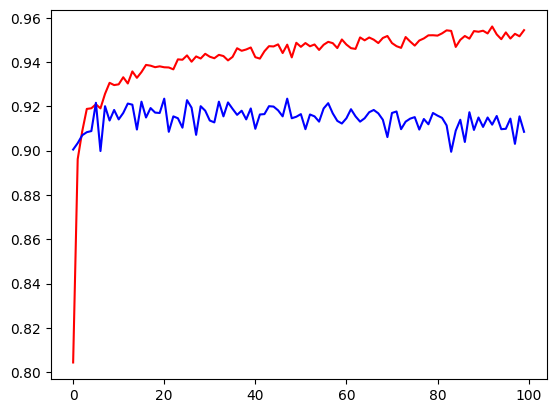

In [ ]:
# 시각화를 통해서 확인
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.show()

In [ ]:
# MNIST를 Deep Network으로 구현해 보아요!
# 대표적인게 Early Stopping(조기종료) 기능!
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

# display(df.head()) # 5 rows × 785 columns

# 결측치와 이상치가 없어요!
# Feautre Engineering을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                             # 하지만 keras에게 one-hot처리를 위임할 수
                             # 있어서 따로 처리는 안할꺼예요!
# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# 조기종료 기능 설정
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 조기 종료의 기준
# patience : loss값이 중가하는걸 몇번참을것인가에 대한 숫자
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[es_cb],
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 3s 11ms/step - loss: 0.3214 - acc: 0.9002 - val_loss: 0.2174 - val_acc: 0.9276
Epoch 2/100
236/236 [==============================] - 2s 8ms/step - loss: 0.1535 - acc: 0.9535 - val_loss: 0.1627 - val_acc: 0.9515
Epoch 3/100
236/236 [==============================] - 1s 6ms/step - loss: 0.1199 - acc: 0.9634 - val_loss: 0.1548 - val_acc: 0.9585
Epoch 4/100
236/236 [==============================] - 1s 6ms/step - loss: 0.0978 - acc: 0.9700 - val_loss: 0.1565 - val_acc: 0.9585
Epoch 5/100
236/236 [==============================] - 1s 6ms/step - loss: 0.1011 - acc: 0.9706 - val_loss: 0.2115 - val_acc: 0.9500
Epoch 6/100
236/236 [==============================] - 1s 6ms/step - loss: 0.0904 - acc: 0.9743 - val_loss: 0.1640 - val_acc: 0.9609
Epoch 7/100
236/236 [==============================] - 1s 6ms/step - loss: 0.0796 - acc: 0.9764 - val_loss: 0.1401 - val_acc: 0.9648
Epoch 8/100
236/236 [==============================] - 1s 6ms/step -

# 12월 14일

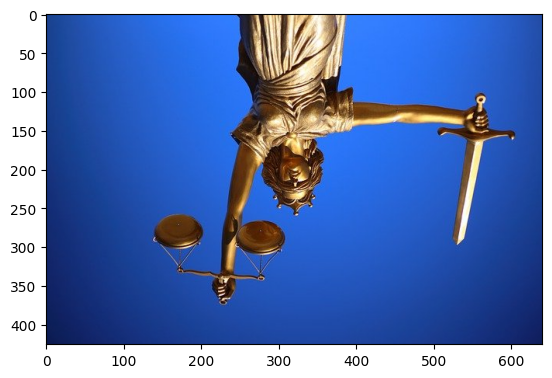

In [ ]:
# 이미지를 pixel로 표현해 보아요!
# 이미지를 표현하기 위해서 여러개의 module을 이용할 수 있어요!

# 가장 대표적인 module이 matplotlib library
# 또 다른 module로 Pillow라는 module도 많이 이용

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/AI스쿨 파일/ML/Image/justice.jpg')
# plt.imshow(img)
# plt.show()

# 이미지 객체를 ndarray로 변환할 꺼예요!
# 이미지는 pixel의 집합이예요! 각 pixel은 3개의 값으로 구성되어 있어요!
# 따라서 모든 이미지(컬러, 흑백)는 기본적으로 3차원 데이터예요!
img_pixel = np.array(img)
img_pixel.shape


# 이렇게 쉽게 pixel data를 우리가 얻어낼 수 있구요!
# 여러가지 이미지 처리도 가능합니다. - 이미지 잘라내기, 크기 변경, 회전등등

# 잘라내기
crop_img = img.crop((30,100,150,300))
# plt.imshow(crop_img)
# plt.show()

# 크기 변경
resize_img = img.resize((100,100))
# plt.imshow(resize_img)
# plt.show()

# 회전
img_rot = img.rotate(180)
plt.imshow(img_rot)
plt.show()

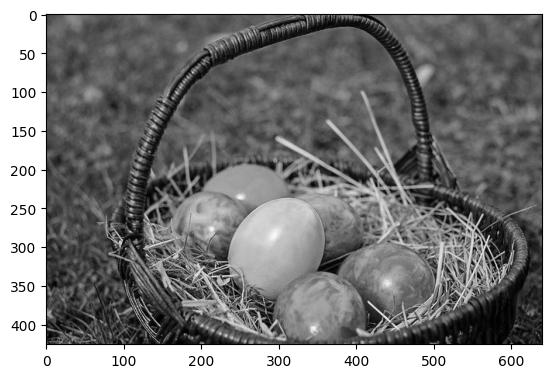

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/AI스쿨 파일/ML/Image/fruits.jpg')
# plt.imshow(img)
# plt.show()

color_pixel = np.array(img)
color_pixel.shape

# 흑백으로 처리!
# 각 pixel의 RGB값의 평균을 구해서 RGB값을 평균값으로 각각 세팅!
gray_pixel = color_pixel.copy()
for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x]))

# 이번에는 3차원 흑백이미지를 2차원으로 표현해 보아요!
gray_2d_pixel = gray_pixel[:,:,0]

plt.imshow(gray_2d_pixel, cmap='gray')
plt.show()

# 12월 15일

(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


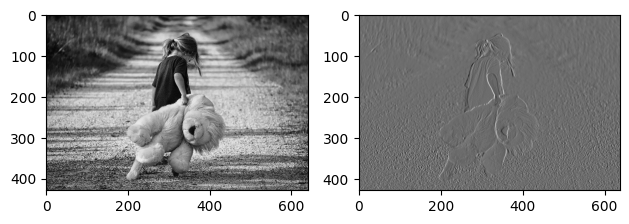

In [ ]:
# 원본 이미지에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img


# 그림을 두개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 오른쪽 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
fig = plt.figure()

origin = fig.add_subplot(1,2,1)
feature = fig.add_subplot(1,2,2)

img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/Image/girl-teddy.jpg')
origin.imshow(img)

# 입력 데이터는 4차원이므로
# 우리의 데이터도 4차원으로 변경
input_img = origin_img.reshape((1,) + origin_img.shape)
input_img.shape

# 계산을 위해 정수 -> 실수
input_img = input_img.astype(np.float32)

# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_img[:,:,:,0:1]
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3,3,1,1) => (filter의 hieght, filter의 width,
              # filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()


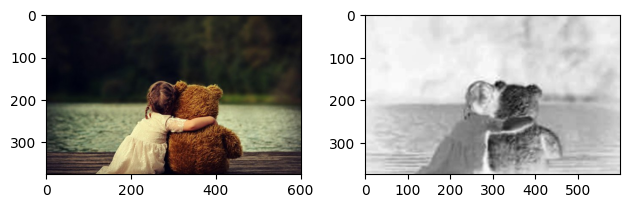

In [ ]:
# 원본 이미지(컬러이미지)에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
origin = fig.add_subplot(1,2,1)
feature = fig.add_subplot(1,2,2)

img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/Image/girl-teddy-color.jpg')
origin.imshow(img)
img.shape  # (376, 602, 3)

# 입력 데이터는 4차원 이므로 4차원으로 변경
# (이미지 개수, height, width, color)
input_img = img.reshape((1,) + img.shape)
input_img.shape  # (1, 376, 602, 3)

# 계산을 위해 pixel값을 정수 -> 실수
input_img = input_img.astype(np.float32)

# filter 생성
# (3,3,3,1)
filter = np.array([[[[-1],[0],[1]],[[-1],[0],[1]],[[-1],[0],[1]]],
                   [[[-1],[0],[1]],[[-1],[0],[1]],[[-1],[0],[1]]],
                   [[[-1],[0],[1]],[[-1],[0],[1]],[[-1],[0],[1]]]])

conv2d = tf.nn.conv2d(input_img,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')
conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
feature.imshow(t_img,
               cmap='gray')

plt.tight_layout()
plt.show()

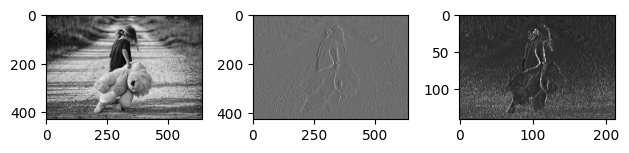

In [ ]:
# 원본 이미지에 대해 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!
# 흑백이미지를 가지고 1 channel을 사용해서 convolution 연산과
# pooling  연산을 수행해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/Image/girl-teddy.jpg')
ax1.imshow(img)

input_img = img.reshape((1,)+img.shape)
input_img.shape

input_img = input_img.astype(np.float32)

channel_1_input_img = input_img[:,:,:,0:1]
channel_1_input_img.shape

filter = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])

filter.shape

conv2d = tf.nn.conv2d(channel_1_input_img,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
ax2.imshow(t_img, cmap='gray')

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result = pool.numpy()
p_img = pool_result[0,:,:,:]
ax3.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()

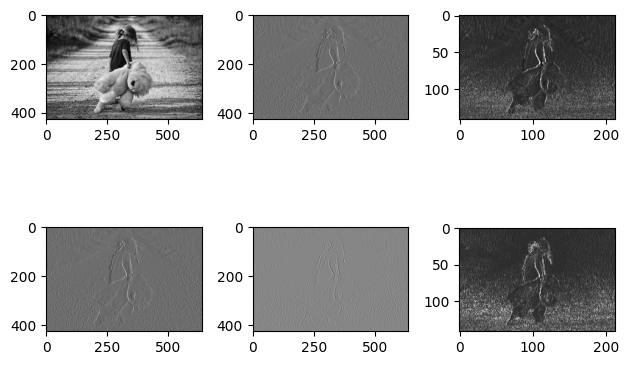

In [ ]:
# pooling한 결과에 convolution을 연속으로 2번 수행하고
# 마지막으로 pooling을 1번 더 수행해서 그 결과를 그림으로 출력
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/Image/girl-teddy.jpg')
ax1.imshow(img)

input_img = img.reshape((1,)+img.shape)
input_img.shape

input_img = input_img.astype(np.float32)

channel_1_input_img = input_img[:,:,:,0:1]
channel_1_input_img.shape

filter = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])

filter.shape

conv2d = tf.nn.conv2d(channel_1_input_img,
                      filter,
                      strides=[1,1,1,1],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
ax2.imshow(t_img, cmap='gray')

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result = pool.numpy()
p_img = pool_result[0,:,:,:]
ax3.imshow(p_img, cmap='gray')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
ax4.imshow(t_img, cmap='gray')

conv2d = tf.nn.conv2d(conv2d_result,
                      filter,
                      strides=[1,1,1,1,],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0,:,:,:]
ax5.imshow(t_img, cmap='gray')

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1],
                      padding='VALID')

pool_result = pool.numpy()

p_img = pool_result[0,:,:,:]

ax6.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
# MNIST 데이터를 이용해서
# CNN 구현을 해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Raw Data Loading

df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
# 이렇게 얻어온 데이터는 당연히 2차원데이터예요!

# 결측치 없고, 이상치 없어요!
# feature engineering도 그닥 할게 없어요!

# 독립변수와 종속변수를 분리!
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

## 그 다음은 학습에 관련된 DNN이 나오면 되요!

model.add(Flatten())   # 데이터를 1차원으로 평평하게 피세요!

# hidden layer
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_data_train_norm.reshape(-1,28,28,1),
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.3,
                    verbose=1)


Epoch 1/100
206/206 [==============================] - 9s 8ms/step - loss: 0.3392 - acc: 0.8926 - val_loss: 0.1035 - val_acc: 0.9678
Epoch 2/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0800 - acc: 0.9755 - val_loss: 0.0739 - val_acc: 0.9778
Epoch 3/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0535 - acc: 0.9832 - val_loss: 0.0596 - val_acc: 0.9796
Epoch 4/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0350 - acc: 0.9888 - val_loss: 0.0453 - val_acc: 0.9842
Epoch 5/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0299 - acc: 0.9903 - val_loss: 0.0507 - val_acc: 0.9839
Epoch 6/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0230 - acc: 0.9922 - val_loss: 0.0421 - val_acc: 0.9871
Epoch 7/100
206/206 [==============================] - 1s 7ms/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0414 - val_acc: 0.9880
Epoch 8/100
206/206 [==============================] - 1s 7ms/step - 

394/394 [==============================] - 1s 3ms/step - loss: 0.1202 - acc: 0.9888
[0.12016087770462036, 0.9888095259666443]


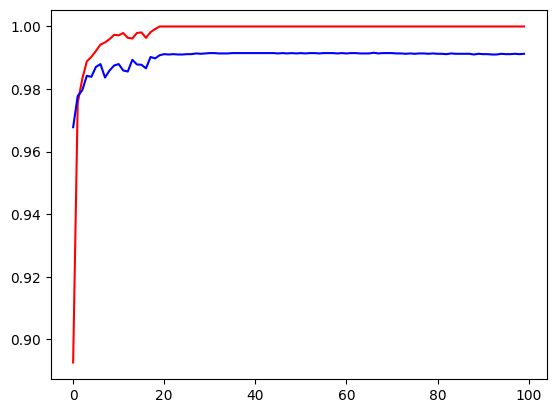

In [ ]:
# evaluation

print(model.evaluate(x_data_test_norm.reshape(-1,28,28,1),
                     t_data_test))
# [0.10472974926233292, 0.989047646522522]

# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')

plt.show()